# Restricted Boltzman Machine Drill -- Kristofer Schobert

In this assignment, we will use the Restricted Boltzman Machine algorithm to extract features from a dataset of pokemon images.

The images are jpgs and pngs.

This dataset was found on kaggle at: https://www.kaggle.com/vishalsubbiah/pokemon-images-and-types/version/2

In [2]:
#importing necessary packages

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.ndimage import convolve
from sklearn import linear_model, datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.base import clone
from sklearn.model_selection import GridSearchCV
from PIL import Image
import os
from numpy import array
import glob
import re

In [3]:
## converting all jpgs to pngs. Thus we will have only one file type.

## This has been done and does not need to be done again, thus the commenting out
# for filename in glob.glob('pokemon-images-and-types/images/*.jpg'): 
#     im = Image.open(filename)
#     fn, fext = os.path.splitext(filename)
#     im.save('pokemon-images-and-types/images/{}.png'.format(fn[32:]))
#     im.close()


We will now create several lists where the ith element contains information on the ith pokemon.

In [4]:
# creating a list of the images of the pokemon
image_list = []

# creating a list of the names of the pokemon
names = []
for filename in glob.glob('pokemon-images-and-types/images/*.png'): 
    names.append(re.search('\/([a-z-0-9]*?)\.', filename).group(0)[1:-1])
    im=Image.open(filename)
    imc = im.copy()
    image_list.append(imc)
    im.close()

# creating a list of grayscale pokemon images.   
grays= []
for i in image_list:
    grays.append(i.convert(mode="RGBA").convert(mode="L"))   


# creating a list of the arrays of grayscale values of each pokemon image.  
arr_list = []
for i in grays:
    arr_list.append(array(i))    
    
# turning each array in the previous list into a list
# the 120 by 120 array of pixel values is now a 14400 element list.
# grayscale values are of the range 0 (black) to 255 (white).
# we normalize the values so that 0 is black and 1 is white.
# sklearns model requires us to input values between 0 and 1. 
gray_scale_list = []
for i in grays:
    gray_scale_list.append(list(array(i).reshape(14400)/255))  
    
# reading the csv which contains the pokemon and their type.
# we ulimately do not this information, but I have included this becaues
# it may be useful for future additions to this project. 
df_types = pd.read_csv('pokemon-images-and-types/pokemon.csv')

types = []
for i in names:
    types.append(df_types.loc[df_types.Name == i]['Type1'].item())
    

In [5]:
# varifying that the shape of gray_scale_list is as expected
np.array(gray_scale_list).shape

(809, 14400)

In [6]:
# varifying that the lengths of each list are the same.
len(gray_scale_list) == len(names) == len(types) == len(arr_list) == len(image_list)

True

meowth
Normal


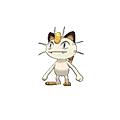

In [12]:
#printing out an example pokemon
print(names[706])
print(types[706])
image_list[706]


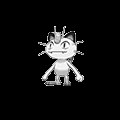

In [13]:
grays[706]

## Implementing scikit-learn's BernoulliRBM model

We will choose to extract 100 features from this unsupervised neural network.

In [25]:
from sklearn.neural_network import BernoulliRBM
rbm = BernoulliRBM(n_components=100)
rbm.fit(gray_scale_list)

BernoulliRBM(batch_size=10, learning_rate=0.1, n_components=100, n_iter=10,
       random_state=None, verbose=0)

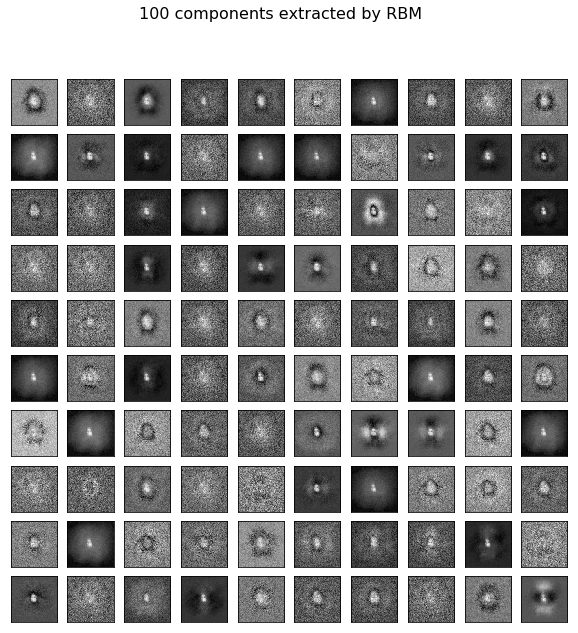

In [26]:
# plotting the 100 features we extracted fromt the images.

plt.figure(figsize=(10, 10))
for i, comp in enumerate(rbm.components_):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((120, 120)), cmap=plt.cm.gray,
               interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.suptitle('100 components extracted by RBM', fontsize=16)
plt.show()

## Concluding Thoughts

In each of these 100 features, we see some degree radial symmetry. In each image, The pokemon are centered, thus we would expect our features to have this symmetry. However, some features are not so symmentric. For example, the last feature has some higher (whiter) pixel values above and below the center. This feature is thus capturing more of the subtleties of the images. It could be usful in determining taller pokemon from shorter ones. Some feature have the same relative pixel value from the center of the image to the edge (e.g. feature 17). However, other features' pixel values vary more as we move from the center of the image to the edge. In the first feature, we see high values towards the center, low values surrounding that and mid-range values further out. This feature is capturing the varying brightness of the images from the image's center to its edge. 

It would be interesting to see how RMB extracts features with colored images. It would also be interested to see how RMB extracts features from images that are not so radially symmetric. It would also be interesting to perform a similar treatment using su